## Examples from Hogg (2010) - 15/10/18

The code in this file follows the exercises explained in the paper by
Hogg et al. (2010), as a means of familiarising myself with statistical
approaches to data analysis. Exercises 1-3 consider the technique of linear
regression to equations of the form:

$$f(x) = mx + c$$

$$g(x) = qx^{2} + mx + c$$


In [1]:
# Author: Daniel Williams
import numpy as np
import matplotlib.pyplot as plt


# Import file containing trial data
data = np.genfromtxt('hoggtutorial.txt', names=True)

Below is the function that performs the matrix operations in order to provide the 'best fit' parameters.

The notation in python is a little cumbersome so I have written it here for greater clarity.

$ \begin{bmatrix}
       b \\[0.3em]
       m \\[0.3em]
     \end{bmatrix} = \mathbf{X} = \left[ \mathbf{A}^{T} \mathbf{C}^{-1} \mathbf{A} \right]^{-1} \left[ \mathbf{A}^{T} \mathbf{C}^{-1} \mathbf{Y} \right]$
     

In [2]:
# Matrix notation of below: (A.T * C^-1 * A)^-1 (A.T * C^-1 * Y)
def matrix(Y, A, C):
    Xa = np.linalg.inv(np.dot(A.T,(np.dot(np.linalg.inv(C),A))))
    Xb = np.dot(A.T,(np.dot(np.linalg.inv(C),Y)))
    return np.dot(Xa,Xb)

### Exercise 1

Fitting a linear relation to data with outliers removed.

m = [2.221363]
c = [33.45048483]


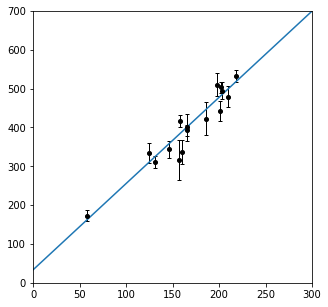

In [3]:
ex1 = data[4:20]
Y = np.array(ex1['y']).reshape((len(ex1), 1))
A = np.c_[ np.ones(len(ex1)), ex1['x']]
C = np.diag(ex1['sigy'])


c = matrix(Y, A, C)[0]
m = matrix(Y, A, C)[1]
xfit = np.arange(0,700)
yfit = xfit*m + c


plt.figure(1, figsize=(5,5))
plt.errorbar(ex1['x'], ex1['y'],  yerr=ex1['sigy'], fmt='o', c='k', capsize=2, markersize=4, elinewidth=1)
plt.plot(xfit, yfit)
plt.xlim(0,300)
plt.ylim(0,700)

print('m = ' + str(m))
print('c = ' + str(c))

### Exercise 2

Fitting a linear relation to data including outliers.

m = [0.8965819]
c = [252.47202852]


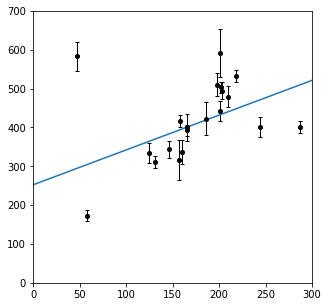

In [4]:
ex2 = data
Y = np.array(ex2['y']).reshape((len(ex2), 1))
A = np.c_[ np.ones(len(ex2)), ex2['x']]
C = np.diag(ex2['sigy'])

c = matrix(Y, A, C)[0]
m = matrix(Y, A, C)[1]

yfit = xfit*m + c

plt.figure(2, figsize=(5,5))
plt.errorbar(ex2['x'], ex2['y'],  yerr=ex2['sigy'], fmt='o', c='k', capsize=2, markersize=4, elinewidth=1)
plt.plot(xfit, yfit)
plt.xlim(0,300)
plt.ylim(0,700)

print('m = ' + str(m))
print('c = ' + str(c))

### Exercise 3

Fitting a quadratic relation to data with outliers removed.

q = [0.00271982]
m = [1.44690351]
c = [81.92857798]


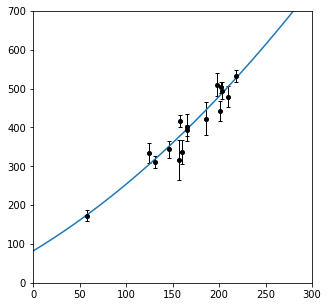

In [5]:
ex3 = data[4:20]
Y = np.array(ex3['y']).reshape((len(ex3), 1))
A = np.c_[ np.ones(len(ex3)), ex3['x'], (ex3['x'])**2]
C = np.diag(ex3['sigy'])

c = matrix(Y, A, C)[0]
m = matrix(Y, A, C)[1]
q = matrix(Y, A, C)[2]


yfit = q*xfit**2 + xfit*m + c


plt.figure(3, figsize=(5,5))
plt.errorbar(ex3['x'], ex3['y'],  yerr=ex3['sigy'], fmt='o', c='k', capsize=2, markersize=4, elinewidth=1)
plt.plot(xfit, yfit)
plt.xlim(0,300)
plt.ylim(0,700)

print('q = ' + str(q))
print('m = ' + str(m))
print('c = ' + str(c))